In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error
import joblib
import numpy as np

In [2]:
data = pd.read_csv(r'C:\Users\Nishath Tabassum\OneDrive\Desktop\project\yield_df.csv')
data = data.drop(['Unnamed: 0'], axis=1)  # Drop index column if present

# Encode categorical features
le_area = LabelEncoder()
le_item = LabelEncoder()
data['Area'] = le_area.fit_transform(data['Area'])
data['Item'] = le_item.fit_transform(data['Item'])

data.head()


,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,1,1990,36613,1485.0,121.0,16.37
1,0,3,1990,66667,1485.0,121.0,16.37
2,0,4,1990,23333,1485.0,121.0,16.37
3,0,5,1990,12500,1485.0,121.0,16.37
4,0,6,1990,7000,1485.0,121.0,16.37


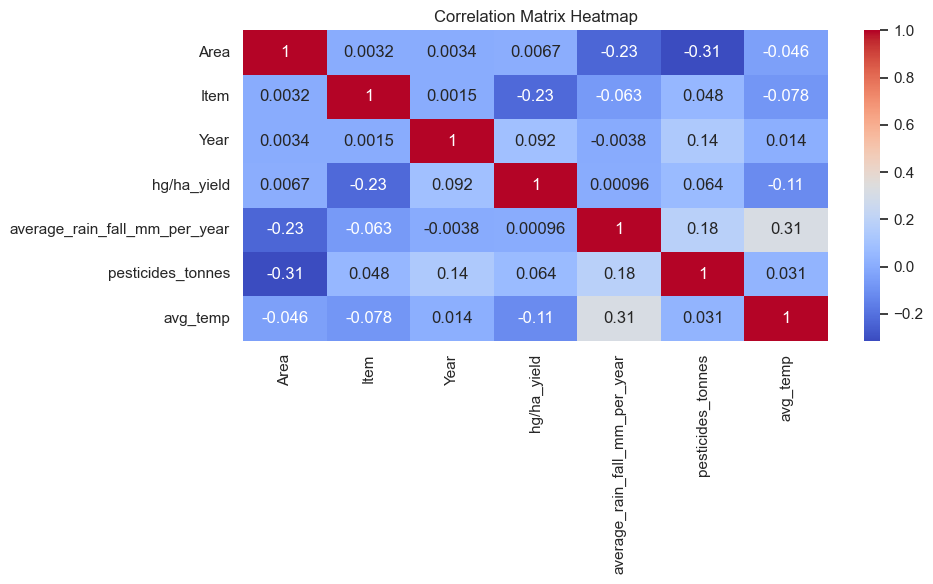

In [3]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix Heatmap")
plt.tight_layout()
plt.show()


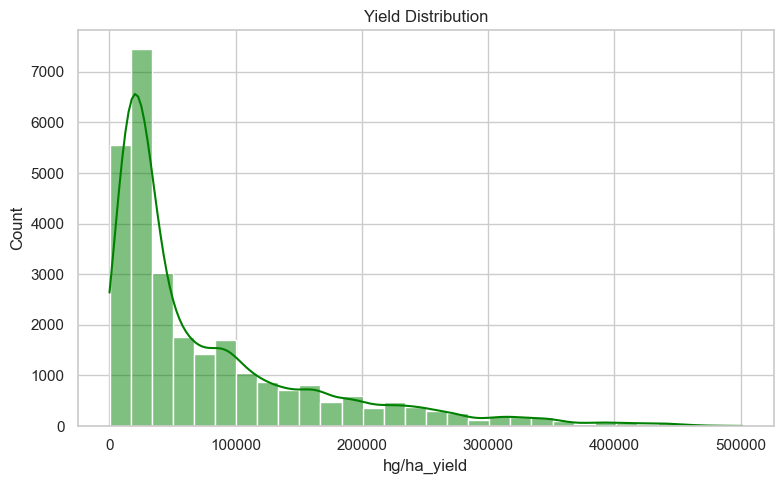

In [4]:
plt.figure(figsize=(8, 5))
sns.histplot(data['hg/ha_yield'], kde=True, bins=30, color='green')
plt.title("Yield Distribution")
plt.xlabel("hg/ha_yield")
plt.tight_layout()
plt.show()


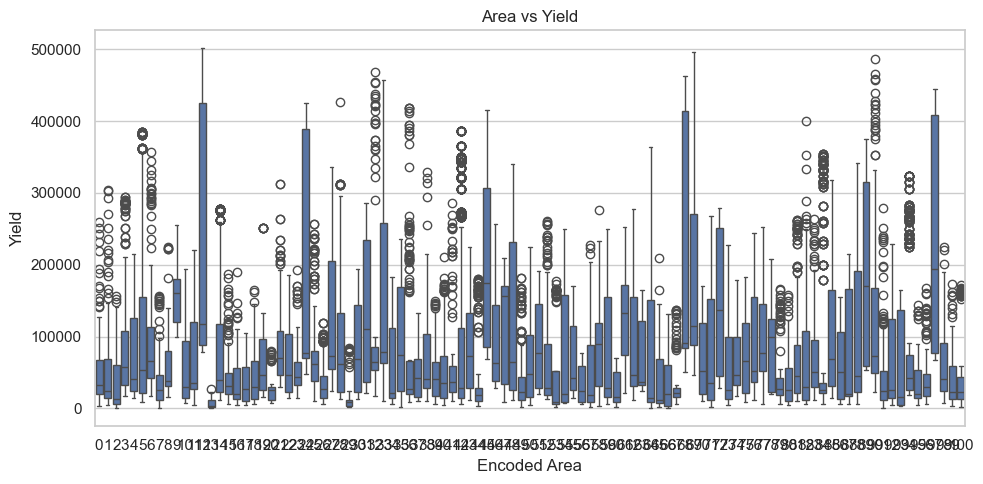

In [10]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=data['Area'], y=data['hg/ha_yield'])
plt.title("Area vs Yield")
plt.xlabel("Encoded Area")
plt.ylabel("Yield")
plt.tight_layout()
plt.show()


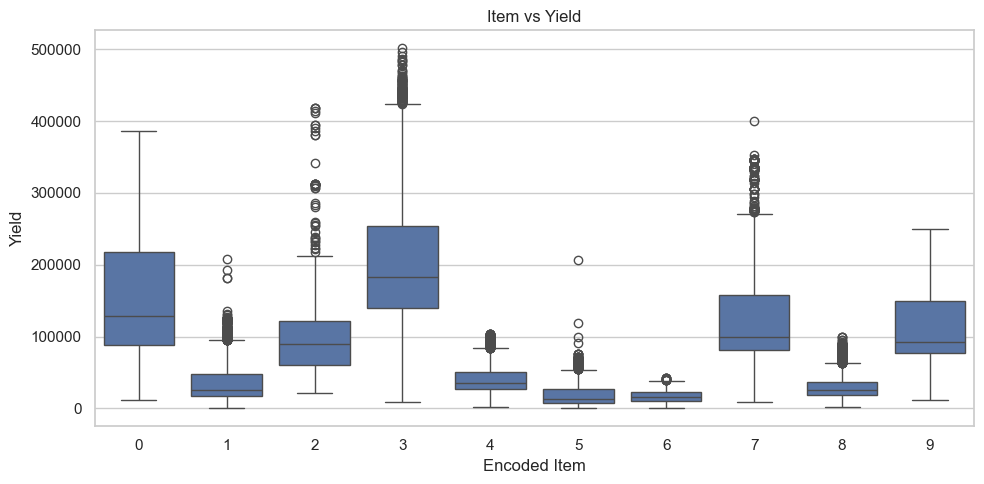

In [5]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=data['Item'], y=data['hg/ha_yield'])
plt.title("Item vs Yield")
plt.xlabel("Encoded Item")
plt.ylabel("Yield")
plt.tight_layout()
plt.show()


In [6]:
X = data.drop(['hg/ha_yield'], axis=1)
y = data['hg/ha_yield']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [7]:
joblib.dump(model, 'yield_model.pkl')
joblib.dump(le_area, 'area_encoder.pkl')
joblib.dump(le_item, 'item_encoder.pkl')


['item_encoder.pkl']

In [8]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_score = model.score(X_test, y_test)

print("✅ Model Evaluation Metrics:")
print(f"  - R² Score: {round(r2_score, 4)}")
print(f"  - MAE: {round(mae, 2)}")
print(f"  - MSE: {round(mse, 2)}")
print(f"  - RMSE: {round(rmse, 2)}")


✅ Model Evaluation Metrics:
  - R² Score: 0.9857
  - MAE: 3752.48
  - MSE: 103668278.62
  - RMSE: 10181.76
